In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [472]:
from sklearn.datasets import load_iris
iris = load_iris()
# iris.data
iris.target & 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [400]:
# Récupération du csv et placement dans un dataframe
iris = pd.read_csv("C:\\Python39\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv")
iris_setosa = pd.read_csv("C:\\Python39\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv")
iris_versicolor = pd.read_csv("C:\\Python39\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv")
iris_virginica = pd.read_csv("C:\\Python39\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv")

In [401]:
# Ajouter les colonnes
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [402]:
# Ajouter les colonnes
iris_setosa.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
# On définie que 0 = setosa, 1 = non-setosa
iris_setosa.loc[(iris_setosa.Species == 0),'Species']= 0
iris_setosa.loc[(iris_setosa.Species == 1),'Species']= 1
iris_setosa.loc[(iris_setosa.Species == 2),'Species']= 1

In [403]:
# print(iris_setosa.to_string())

In [404]:
# Ajouter les colonnes
iris_versicolor.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
# On définie que 1 = versicolor, 2 = non-versicolor
iris_versicolor.loc[(iris_versicolor.Species == 0),'Species']= 2
iris_versicolor.loc[(iris_versicolor.Species == 1),'Species']= 1
iris_versicolor.loc[(iris_versicolor.Species == 2),'Species']= 2

In [405]:
# print(iris_versicolor.to_string())

In [406]:
# Ajouter les colonnes
iris_virginica.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
# On définie que 0 = non virginica, 1 = virginica
iris_virginica.loc[(iris_virginica.Species == 0),'Species']= 0
iris_virginica.loc[(iris_virginica.Species == 1),'Species']= 0
iris_virginica.loc[(iris_virginica.Species == 2),'Species']= 1

In [407]:
# print(iris_virginica.to_string())

## Iris setosa model (1)

In [414]:
from sklearn.model_selection import train_test_split
X1 = iris_setosa.iloc[:, 0:4]
y1 = iris_setosa.iloc[:, 4]
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1, test_size = 0.3,random_state=42)

In [415]:
print(len(X1_train), len(X1_test), len(y1_train), len(y1_test))

105 45 105 45


In [433]:
from sklearn.svm import LinearSVC

# X1, y1 = make_classification(n_features=4, random_state=0)
# clf1 = make_pipeline(StandardScaler(),
#                      LinearSVC(random_state=0, tol=1e-5))
# clf1.fit(x1_train, y1_train)
clf1 = OneVsRestClassifier(LinearSVC()).fit(X1_train, y1_train)
df1 = clf1.decision_function(X1)
clf1.predict(X1_test)
df1, y1

(array([ 0.00441482,  1.08110116, -1.11540214, -0.54509721, -0.91259136,
        -2.04257967, -1.30885154, -0.1769394 , -0.3405794 ,  0.34306968,
        -0.76827614, -0.06257304,  0.53575542,  2.31686723, -0.27052907,
        -0.60884914, -1.07136279, -1.58829563, -0.07197228,  1.34182296,
        -0.08790883, -1.31968137, -2.01453996,  0.43924401, -0.38565609,
        -0.6422616 ,  0.4377139 ,  0.09511037, -1.04922935,  0.03887268,
        -0.65842474,  1.44980527, -2.17964221,  0.62212836, -0.60569064,
         1.97984348, -0.20382619,  1.78533234, -2.86424766, -0.55841475,
         0.54016455,  0.17020532, -0.98282356, -0.6429001 , -1.07178536,
         0.19593484, -0.87410571, -0.8675798 ,  0.27617487, -1.42476435,
         2.06294076, -3.02714887, -1.09858508, -0.41098884, -0.53755492,
         2.16170352, -2.3695794 , -0.28663872,  1.0638566 ,  1.53904465,
        -0.72142816, -0.21527331, -0.01918515, -0.62866458,  0.2806528 ,
         3.73346044, -0.29224375,  0.86428539, -0.2

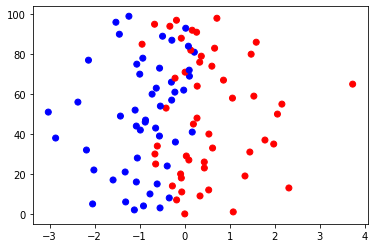

In [434]:
import matplotlib.pyplot as plt
aa=np.array([i for i in range(100)])
aa.shape, df1.shape

color=[]
for val in y1:
    if val==1:
        color.append('red')
    else:
        color.append('blue')
plt.scatter(df1, aa, color=color)
plt.show()

## Iris versicolor model (2)

In [435]:
from sklearn.model_selection import train_test_split
X2 = iris_versicolor.iloc[:, 0:4]
y2 = iris_versicolor.iloc[:, 4]
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size = 0.3,random_state=42)

In [436]:
print(len(X2_train), len(X2_test), len(y2_train), len(y2_test))

105 45 105 45


In [437]:
from sklearn.svm import LinearSVC

# X2_valid, y2_valid = make_classification(n_features=4, random_state=0)
# clf2 = make_pipeline(StandardScaler(),
#                      LinearSVC(random_state=0, tol=1e-5))
# clf2.fit(x1_train, y1_train)
clf2 = OneVsRestClassifier(LinearSVC()).fit(X2_train, y2_train)
clf2.predict(X2_test)

C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int64)

In [438]:
# y2_pred=clf2.predict(X2_valid)
# X2_valid, y2_valid

In [439]:
# accuracy = accuracy_score(y2_valid, y2_pred)*100
# print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

## Iris virginica model (3)

In [440]:
from sklearn.model_selection import train_test_split
X3 = iris_virginica.iloc[:, 0:4]
y3 = iris_virginica.iloc[:, 4]
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3, test_size = 0.3,random_state=42)

In [441]:
print(len(X3_train), len(X3_test), len(y3_train), len(y3_test))

105 45 105 45


In [442]:
from sklearn.svm import LinearSVC

X3_valid, y3_valid = make_classification(n_features=4, random_state=0)
# clf3 = make_pipeline(StandardScaler(),
#                      LinearSVC(random_state=0, tol=1e-5))
# clf3.fit(x1_train, y1_train)
clf3 = OneVsRestClassifier(LinearSVC()).fit(X3_train, y3_train)
clf3.predict(X3_test)

C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0], dtype=int64)

## One-versus-one OvO

In [443]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(X_train, y_train)
clf.predict(X_test)

C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## KNN model and plot

In [444]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [445]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.78 %.


In [453]:
# même façon de faire avec sur training data puis test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, y_test)))

The accuracy of the knn classifier is 0.97 out of 1 on training data
The accuracy of the knn classifier is 0.98 out of 1 on test data


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-386-10492fe06a71>:37: Matplotli

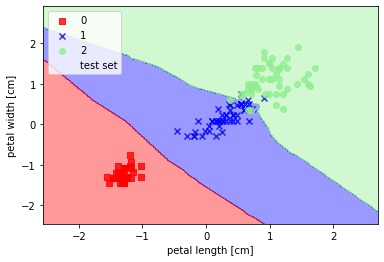

In [456]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
# X_combined_std.shape, y_combined.shape
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## KNN best value

In [448]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

accuracy_scores=[]
for val in range(1, 50):
    # Instantiate learning model (k = 3)
    classifier = KNeighborsClassifier(n_neighbors=val)

    # Fitting the model
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred)*100)

accuracy_scores


[97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 95.55555555555556,
 97.77777777777777,
 97.77777777777777,
 95.55555555555556,
 95.55555555555556,
 95.55555555555556,
 95.55555555555556,
 95.55555555555556,
 95.55555555555556,
 95.55555555555556,
 93.33333333333333,
 91.11111111111111,
 91.11111111111111,
 91.11111111111111,
 91.11111111111111,
 88.88888888888889,
 88.88888888888889,
 91.11111111111111,
 91.11111111111111,
 88.88888888888889,
 91.11111111111111,
 91.11111111111111,
 91.11111111111111,
 88.88888888888889,
 93.33333333333333]

In [449]:
# score=0
# for val in range(10):
#     score=max(score, val*10)
#     print(val, score)

## Plot ROC curve KNN model and LinearSVC 

In [476]:
#Setosa LinearSVC
metrics.plot_roc_curve(classifier, x1_train, y1_train)  
plt.show()

ValueError: KNeighborsClassifier should be a binary classifier

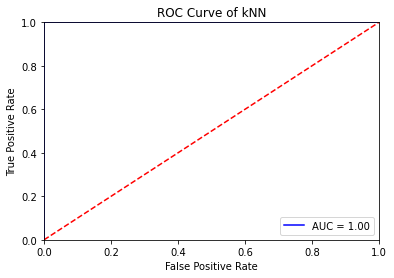

In [459]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X1_train,y1_train)

y_scores = knn.predict_proba(X1_test)
fpr, tpr, threshold = roc_curve(y1_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Exercice 8

In [462]:
crabs = pd.read_csv("C:\\Users\\tadav\\OneDrive\\Bureau\\Data&GO\\DAY 2 MACHINE LEARNING\\crabs_dataset.csv")